In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1

El ejercicio de Juan y Pedro compitiendo con los dados puede resolverse proponiendo un modelo de probabilidad condicional. En particular, dado que el "experimento aleatorio" es simple, puede abordarse mediante la simple tabulacion de los resultados.

Definamos\
* $J$ el dado de Juan
* $P$ el dado de Pedro
* $G_J$ el evento Gano Juan
Lo que queremos encontrar es:\
$\mathbb{P}(J=5 | G_J)$\
Sabemos que $G_J$ implica $J > P$ y podemos reescribir\
$\mathbb{P}(J=5 | J > P) = \frac{\mathbb{P}(\{J=5\} \cap \{J>P\})}{\mathbb{P}\{J>P\}}$\
\\
Que puede resolverse contando los casos en que Juan gana con un 5 y diviendolo por las veces que Juan gana, llegando al resultado de $\frac{4}{15} \sim 0.2666\dots$

## Simulacion

In [70]:
def dados_juan_pedro(k=500):
    '''
    k: Cantidad de tiradas
    '''
    dado_juan = np.random.randint(low=1,high=7,size=k) # High 7 porque es non inclusive
    dado_pedro = np.random.randint(low=1,high=7,size=k)
    gana_juan_mask = dado_juan > dado_pedro
    gana_juan_con_5 = dado_juan[gana_juan_mask] == 5
    return gana_juan_con_5.sum() / gana_juan_mask.sum()

In [80]:
proporcion_empirica = np.array([])
for i in range(500):
    proporcion_empirica = np.append(proporcion_empirica,dados_juan_pedro(k=2500))

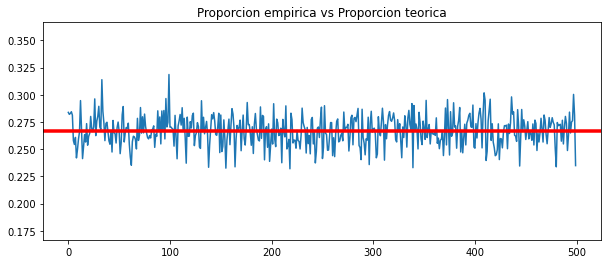

In [98]:
f, ax = plt.subplots(figsize=(10,4))
ax.plot(proporcion_empirica)
ax.axhline(y=4/15,color='red',lw=3.5,xmin=0,xmax=500)
ax.set_title('Proporcion empirica vs Proporcion teorica')
ax.set_ylim(4/15-0.1,4/15+0.1)
plt.show()

In [99]:
np.mean(proporcion_empirica)

0.26695612547787595

# Ejercicio 2

La esperanza del primer corte es la esperanza de una variable Uniforme en $[0,L]$, es decir:
\begin{equation}
\mathbb{E}[Y] = \frac{L}{2}
\end{equation}
La esperanza de $X$ es una uniforme en $[0,Y]$, depende del primer corte, pero podemos definirla como una v.a.:

\begin{equation}
\mathbb{E}[X|Y] = \frac{Y}{2}
\end{equation}

\begin{equation}
\mathbb{E}[X] = \mathbb{E}[\mathbb{E}[X|Y]] = \frac{\mathbb{E}[Y]}{2}=\frac{L}{4}
\end{equation}
\
La varianza de X:
\begin{equation}
\begin{split}
\mathbb{V}[X] &= \mathbb{E}[X^2]-\mathbb{E}[X]^2 \\
              &= \int_{0}^{y} X^2 dx - \frac{L^2}{16} \\
              &= \frac{X^3}{3}\bigg|^{x=y}_{x=0}- \frac{L^2}{16} \\
             \mathbb{V}[X] &= \frac{Y^3}{3}- \frac{L^2}{16}              
\end{split}
\end{equation}

## Simulacion

In [101]:
def simular_corte(L=500):
    corte = np.random.uniform(low=0,high=L+1) # Le agregamos el 1 para usabilidad
    return corte

In [105]:
def doble_corte(L=500):
    primer_corte = simular_corte(L)
    segundo_corte = simular_corte(primer_corte)
    return segundo_corte

In [107]:
cortes = np.array([])
for i in range(1000):
    cortes = np.append(cortes,doble_corte(100))

In [111]:
media_empirica = cortes.mean()

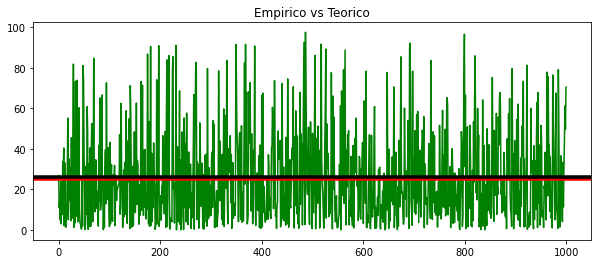

In [119]:
f, ax = plt.subplots(figsize=(10,4))
ax.plot(cortes,color='green')
ax.axhline(y=25,color='red',lw=3.5,xmin=0,xmax=1000)
ax.axhline(y=media_empirica,color='black',lw=3.5,xmin=0,xmax=1000)
ax.set_title('Empirico vs Teorico')
plt.show()

# Ejercicio 3

a)
\begin{equation}
\begin{split}
\mathbb{E}[Z|X] &= \mathbb{E}[X+Y|X] \\
                &= \mathbb{E}[X|X]+ \mathbb{E}[Y|X] \\
                &= X + \frac{1}{2}
\end{split}
\end{equation}

b) La esperanza $\mathbb{E}[X|Z]$ se calcula haciendo un cambio de variables 

\begin{equation}
\begin{split}
Z &= X+Y \\
W &= X
\end{split}
\end{equation}

Operando se llega a una Esperanza por tramos


\begin{eqnarray}
Z &\in [0,1], &X\sim \mathcal{U}(0,Z), &&\mathbb{E}[X|Z] = \frac{Z}{2} \\
Z &\in [1,2], &X\sim \mathcal{U}(Z-1,1), &&\mathbb{E}[X|Z] = \frac{Z}{2}
\end{eqnarray}

c) 
\begin{eqnarray}
\mathbb{E}[ZX|X] &= Z\mathbb{E}[X|X] \\
                 &= Z X
\end{eqnarray}
\
Usando la definicion anterior para $\mathbb{E}[X|Z]$

d) 
\begin{equation}
\mathbb{E}[ZX|Z] = Z\mathbb{E}[X|Z]
\end{equation}
\
Usando la definicion anterior para $\mathbb{E}[X|Z]$